In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt 
import metpy.calc as mpcalc 
from metpy.units import units
import xarray as xr

In [2]:
ds = xr.open_dataset("data")
#ds

In [3]:
# subset the data 
lon = ds["longitude"]
lat = ds["latitude"]
gh_500 = ds.sel(isobaricInhPa = 500)["gh"]
u_500 = ds.sel(isobaricInhPa = 500)["u"]
v_500 = ds.sel(isobaricInhPa = 500)["v"]


In [4]:
time = str(ds["time"].values)

In [5]:
print(lon.min(), lon.max())
print(lat.min(), lat.max())

<xarray.DataArray 'longitude' ()>
array(207.1213775)
Coordinates:
    time     datetime64[ns] 2024-11-04T12:00:00 <xarray.DataArray 'longitude' ()>
array(310.58401341)
Coordinates:
    time     datetime64[ns] 2024-11-04T12:00:00
<xarray.DataArray 'latitude' ()>
array(12.19)
Coordinates:
    time     datetime64[ns] 2024-11-04T12:00:00 <xarray.DataArray 'latitude' ()>
array(61.30935757)
Coordinates:
    time     datetime64[ns] 2024-11-04T12:00:00


In [6]:
# create a mask to focus data on contigous US 

lon_min = 232
lon_max = 296

lat_min = 21
lat_max = 52

mask = (
    (lon > lon_min) &
    (lon < lon_max) & 
    (lat > lat_min) &
    (lat < lat_max)
    
)

lon = lon.where(mask, drop = True)
lat = lat.where(mask, drop = True)

print(lon.min(), lon.max())
print(lat.min(), lat.max())


<xarray.DataArray 'longitude' ()>
array(232.00001722)
Coordinates:
    time     datetime64[ns] 2024-11-04T12:00:00 <xarray.DataArray 'longitude' ()>
array(295.99987808)
Coordinates:
    time     datetime64[ns] 2024-11-04T12:00:00
<xarray.DataArray 'latitude' ()>
array(21.00018153)
Coordinates:
    time     datetime64[ns] 2024-11-04T12:00:00 <xarray.DataArray 'latitude' ()>
array(51.99994131)
Coordinates:
    time     datetime64[ns] 2024-11-04T12:00:00


In [7]:
gh_500 = gh_500.where(mask, drop = True)
u_500 = u_500.where(mask, drop = True)
v_500 = v_500.where(mask, drop = True)

In [8]:
wind_speed_500 = mpcalc.wind_speed(u_500, v_500)

In [9]:
transform = ccrs.PlateCarree() # if dat is lat lon, this will be what your transform is . 
projection = ccrs.PlateCarree()

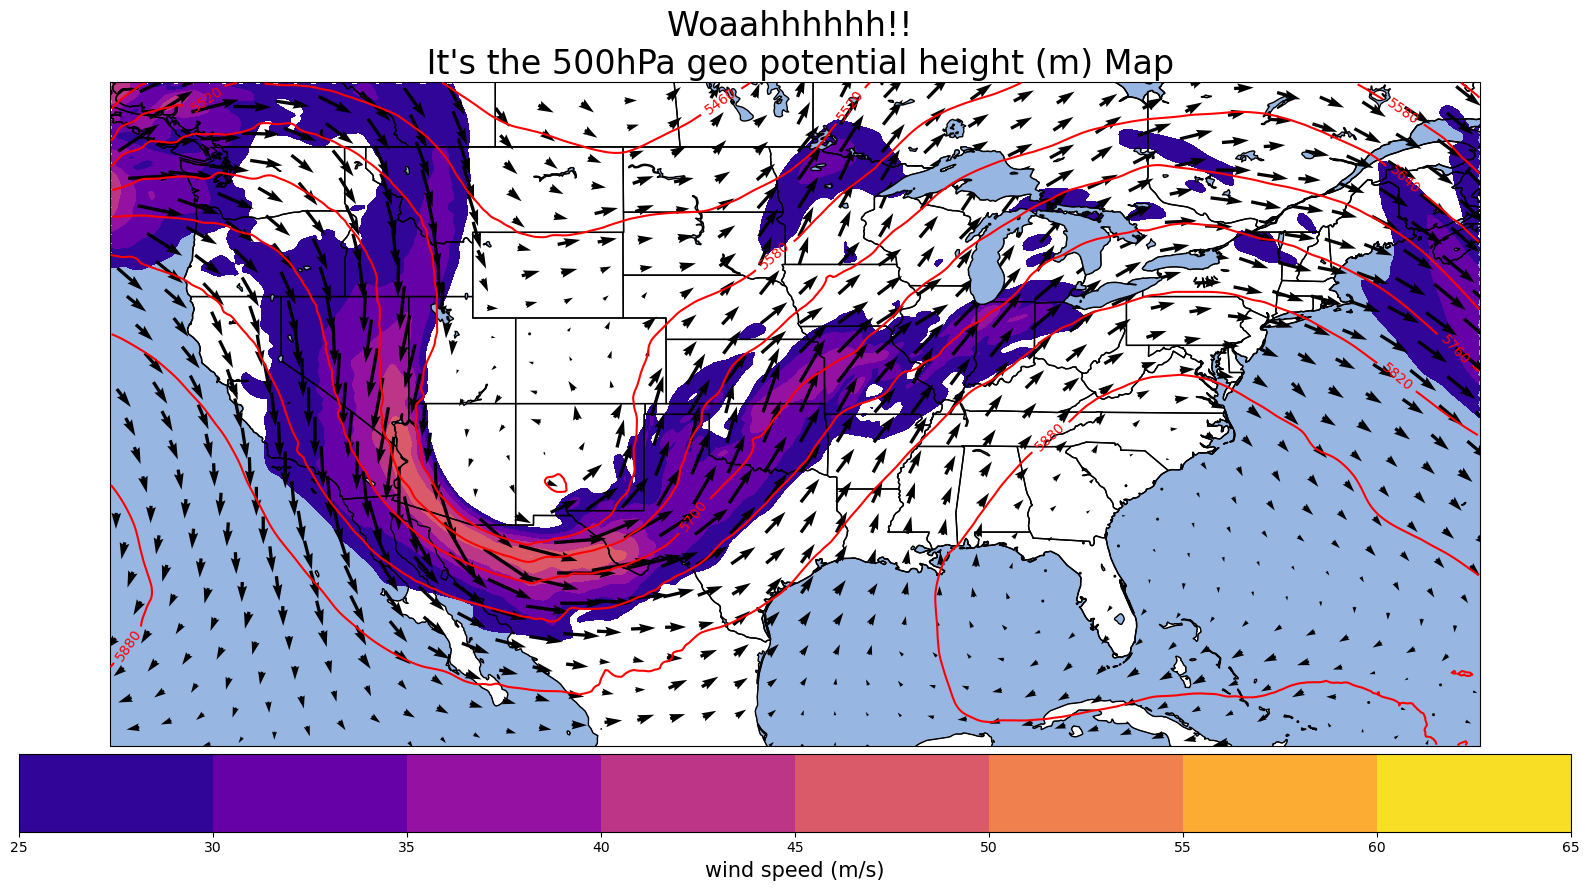

In [26]:
fig, ax = plt.subplots(figsize = (16,9),
    subplot_kw = {"projection": projection} # keywrod: value
)

ax.add_feature(cfeature.BORDERS, edgecolor = "black")
ax.add_feature(cfeature.STATES, edgecolor = "black")
ax.add_feature(cfeature.OCEAN, edgecolor = "black", lw = 0.5)
ax.add_feature(cfeature.COASTLINE, edgecolor = "k")
ax.add_feature(cfeature.LAKES, edgecolor = "black")

ax.set_extent((lon_min, lon_max, lat_min, lat_max), crs = transform)

gh_levels = range(5100, 6060, 60)
gh_contours = ax.contour(lon, lat, gh_500, levels = gh_levels, colors = "red", transform = transform, zorder = 40)

ax.clabel(gh_contours)

isotach_levels = range(25, 70, 5) # highest isotach is 100 since it is 0 indexed 
isotachs = ax.contourf(lon, lat, wind_speed_500, levels = isotach_levels, cmap = "plasma", transform = transform)

cbar = fig.colorbar(isotachs, location = "bottom", pad = 0.01)
cbar.set_label("wind speed (m/s)", size = 15)

quiver_step = 13
quiver_slice = (slice(None, None, quiver_step), slice(None, None, quiver_step))

quiver = ax.quiver(lon[quiver_slice], lat[quiver_slice], u_500[quiver_slice], v_500[quiver_slice])

plt.title("Woaahhhhhh!! \n It's the 500hPa geo potential height (m) Map", size = 24)

plt.tight_layout()
plt.show()
